In [1]:
import pandas as pd
import numpy as np

from train import tester
import warnings
warnings.filterwarnings('ignore')

f_load = pd.read_csv('1년치 소비데이터.csv')
f_load= (f_load['total']/100).astype("int")

f_generation = pd.read_csv("태양광데이터1.csv",encoding='cp949')
f_generation = f_generation[0:365]

start_day = 0 # 인덱스
end_day = 30 #인덱스

a = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
b = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

T = np.identity(n=24, dtype=np.uint8)
# T = np.array(pd.get_dummies(np.array([0,1,2,3,4,5,6,7,8,9,10,11,
#                                       12,13,14,15,16,17,18,19,20,21,22,23])))

winter_TOU = [5,5,5, 5,5,5, 5,15,15, 15,25,10, 10,10,10, 10,10,15, 15,5,5, 5,5,5]  # 겨울
summer_TOU = [5,5,5, 5,5,5, 5,10,10 ,10,10,15, 15,15,15, 15,15,10, 10,5,5,5,5,5]  #여름

Tf= 0
feature = 52 + 2*Tf # 52 + Tf*2
battery_max = 40
pD=30

In [2]:
config = {
    'start_day': start_day,
    'end_day': end_day,
    'a': a,
    'b': b,
    'feature' : feature,
    'summer_TOU':summer_TOU,
    'winter_TOU':winter_TOU,
    'battery_max':battery_max,
    'T':T, 
    'Tf':Tf, 
    'pD':pD, 
    'MPG':False,
    'path':"weight/q_model.pth",
}

result_cost_history, result_action_history, result_battery_history = tester(**config)

load pretrained model here...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 169.91Test/s]


In [3]:
print(result_cost_history)
print(sum(result_cost_history))

[740, 500, 540, 540, 540, 540, 540, 540, 640, 515, 535, 540, 550, 540, 540, 540, 540, 540, 540, 540, 1040, 425, 540, 540, 540, 540, 540, 540, 540, 540]
16825


In [4]:
load_data = np.repeat([a], len(range(start_day, end_day, 1)), axis=0)
generation_data= np.repeat([b], len(range(start_day, end_day, 1)), axis=0)

In [5]:
greedy_cost = 0
for i in range(end_day-start_day):
    TOU = summer_TOU
    for j in range(24):
        gap = load_data[i][j] - generation_data[i][j]
        if gap < 0:
            gap = 0
        greedy_cost = greedy_cost + TOU[j] * gap
    greedy_cost = greedy_cost + 30*max(load_data[i])
print(greedy_cost)

22500


In [6]:
temp_cost = 0
for i in range(end_day-start_day):
    TOU = winter_TOU
    for j in range(24):
        temp_cost = temp_cost + result_action_history[i][j] * TOU[j]
    temp_cost = temp_cost + 30*max(result_action_history[i])
print(temp_cost)

16830


In [14]:
[v for row in range(1) for v in load_data[row]]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

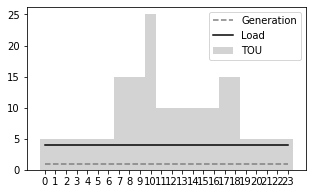

0.11957621574401855


In [18]:
import matplotlib.pyplot as plt
import time
st = time.time()
TOU = winter_TOU

plt.figure(figsize = (5,3))
x = range(0, 24)
y1 = [v for row in range(1) for v in load_data[row]]
y2 = [v for row in range(1) for v in result_action_history[row]]
y3 = [v for v in TOU[0:24]]
y4 = [v for row in range(1) for v in result_battery_history[row]]
y5 = [v for row in range(1) for v in generation_data[row]]

plt.plot(x, y5, '--',label='Generation',color='gray')
plt.plot(x, y1,'-', label='Load', color='black')
plt.bar(x,y3,width=1,label='TOU',color='lightgray')
plt.legend()

plt.xticks(np.arange(0, 24))
plt.show()
    
print(time.time() - st)

In [30]:
load_data.shape

(30, 24)

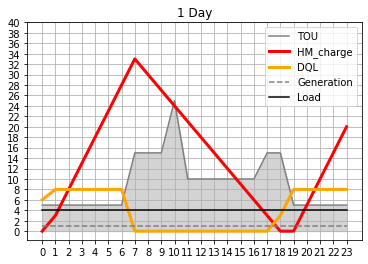

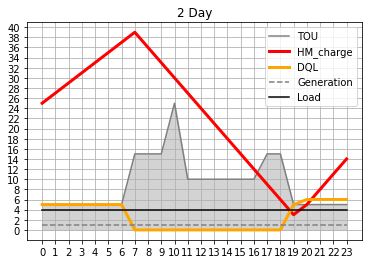

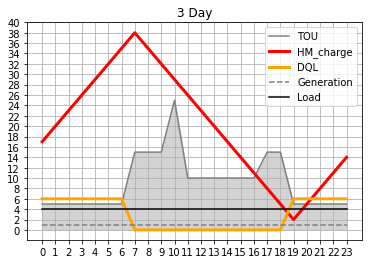

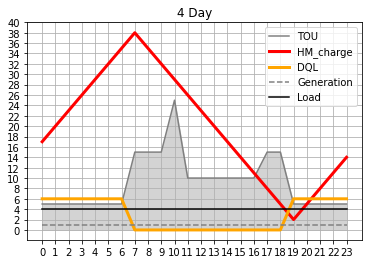

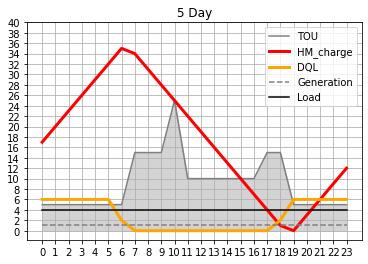

In [37]:
# charge graph

for i in range(5):
    plt.figure(figsize=(6,4))
    x = range(0, 24)
    y1 = [v for v in load_data[i]]
    y2 = [v for v in result_action_history[i]]
    y3 = [v for v in TOU[0:24]]
    y4 = [v for v in result_battery_history[i]]
    y5 = [v for v in generation_data[i]]

    plt.plot(x, y3, label='TOU', color='gray')
    plt.fill_between(x[0:24], y3[0:24], color='lightgray')

    plt.plot(x, y4, linewidth=3, label='HM_charge', color='Red')
    plt.plot(x, y2, linewidth=3 ,label='DQL', color='Orange')
    #plt.plot(x, y5, linewidth=3 ,label='Optimal', color='orange')

    plt.plot(x, y5, '--',label='Generation',color='gray')
    plt.plot(x, y1,'-', label='Load', color='black')

    plt.xticks(np.arange(0, 24))
    plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
    plt.grid(True)
    plt.title(f"{i+1} Day")
    plt.legend(loc="best")
    plt.show()

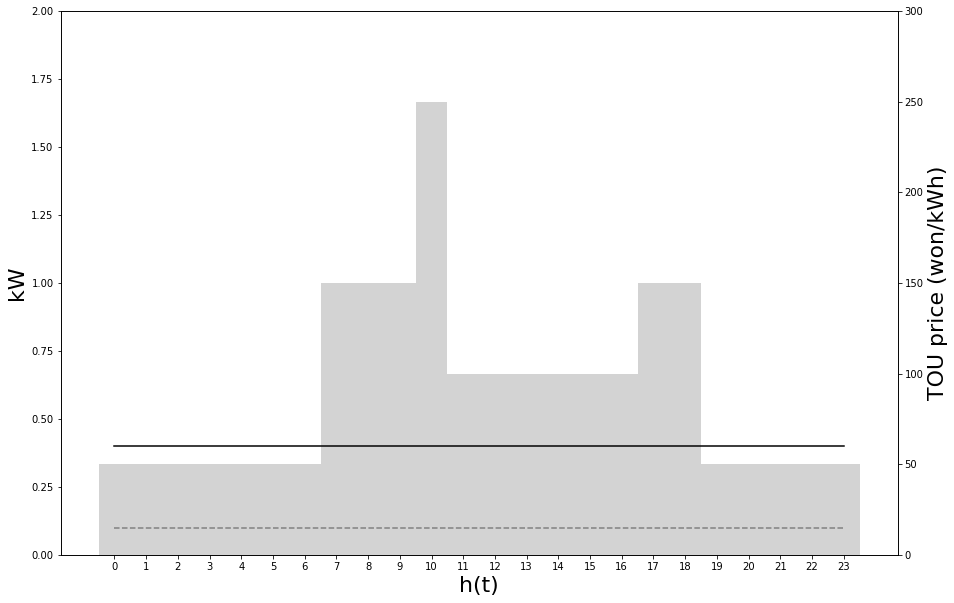

In [38]:
# charge graph
load = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]
generation = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
TOU = [50,50,50, 50,50,50, 50,150,150, 150,250,100, 100,100,100, 100,100,150, 150,50,50, 50,50,50]

for i in range(1):
    x = range(0, 24)
    y1 = load
    y3 = [v for v in TOU[0:24]]
    y5 = generation

    plt.rcParams['figure.figsize'] = (15, 10)
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('h(t)',fontsize=22)
    ax1.set_ylabel('kW',fontsize=22)
    ax1.plot(x, y5, '--',label='Generation',color='gray')
    ax1.plot(x, y1,'-', label='Load', color='black')
    ax2 = ax1.twinx()
    ax2.set_ylabel('TOU price (won/kWh)',fontsize=22)
    ax2.bar(x,y3,width=1,label='TOU',color='lightgray')

    ax1.tick_params(axis='y')
    ax2.tick_params(axis='y')
    ax1.set_ylim([0,2])
    ax2.set_ylim([0,300])
    ax1.set_zorder(ax2.get_zorder() + 10)
    ax1.patch.set_visible(False)
    plt.xticks(np.arange(0, 24))
    plt.show()

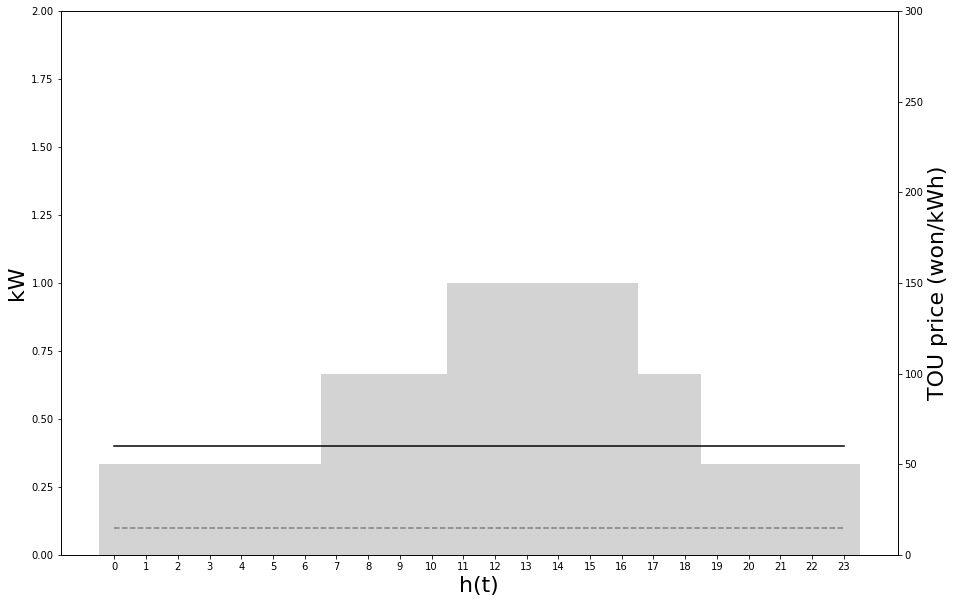

In [39]:
# charge graph
load = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]
generation = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
TOU = [50,50,50, 50,50,50, 50,100,100 ,100,100,150, 150,150,150, 150,150,100, 100,50,50,50,50,50]  #여름

for i in range(1):
    x = range(0, 24)
    y1 = load
    y3 = [v for v in TOU[0:24]]
    y5 = generation

    plt.rcParams['figure.figsize'] = (15, 10)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('h(t)',fontsize=22)
    ax1.set_ylabel('kW',fontsize=22)
    ax1.plot(x, y5, '--',label='Generation',color='gray')
    ax1.plot(x, y1,'-', label='Load', color='black')
    ax2 = ax1.twinx()
    ax2.set_ylabel('TOU price (won/kWh)',fontsize=22)
    ax2.bar(x,y3,width=1,label='TOU',color='lightgray')

    ax1.tick_params(axis='y')
    ax2.tick_params(axis='y')
    ax1.set_ylim([0,2])
    ax2.set_ylim([0,300])
    ax1.set_zorder(ax2.get_zorder() + 10)
    ax1.patch.set_visible(False)
    plt.xticks(np.arange(0, 24))
    plt.show()